In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
train = pd.read_csv('data/train.csv', index_col='id')

In [53]:
train

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,
0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,...,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,...,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,...,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,...,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,...,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199986,QSO,568,20.630780,20.437920,20.050756,20.020974,19.959646,20.948519,20.726709,20.311562,...,20.836400,20.536338,20.126561,20.102815,19.796722,20.783295,20.326879,20.014046,20.061940,19.862513
199987,GALAXY,362,25.283695,22.807243,21.069792,20.187531,19.595598,26.677671,22.818723,20.786120,...,28.895442,22.250489,20.091693,18.985791,18.803354,26.921903,21.952440,19.776321,18.990039,18.528306
199988,STAR_RED_DWARF,146,23.609826,21.902709,20.330747,18.457535,17.326771,24.320816,22.287946,20.711737,...,25.982378,22.132993,20.329624,18.507337,17.418521,24.503460,21.897599,20.420524,18.443126,17.331724


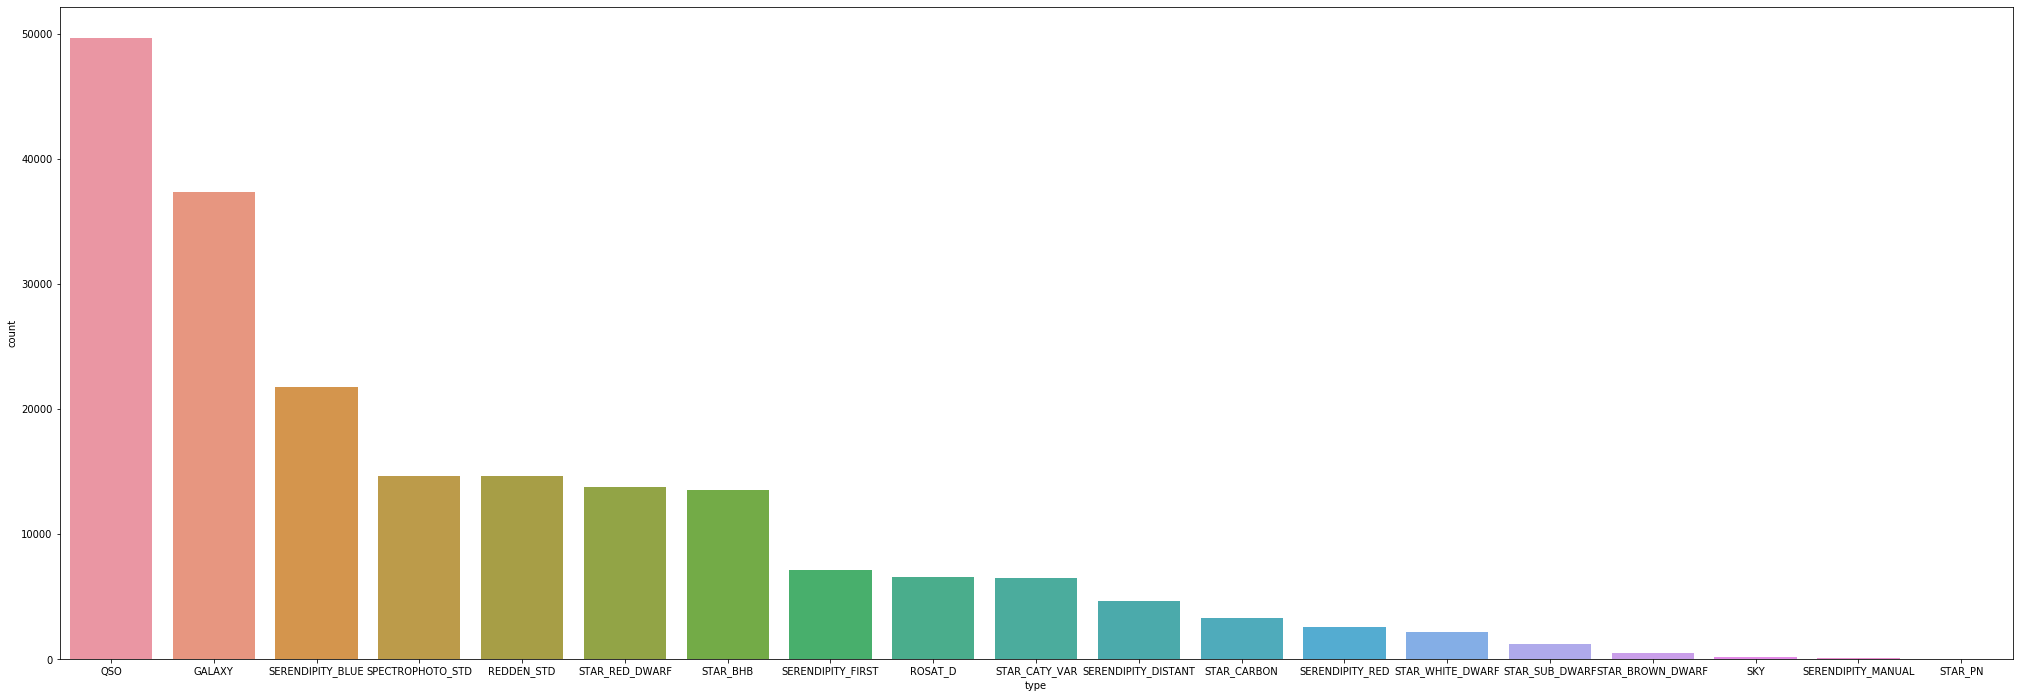

In [6]:
plt.figure(figsize=(35,12))
sns.countplot(x = 'type', data = train, order = train['type'].value_counts().index)  
#type별로 countplot을 그려보았을 때 매우 asymmetric하다. QSO가 가장많고 뒤에 3개는 거의 안보인다.

(21.0, 0.0)

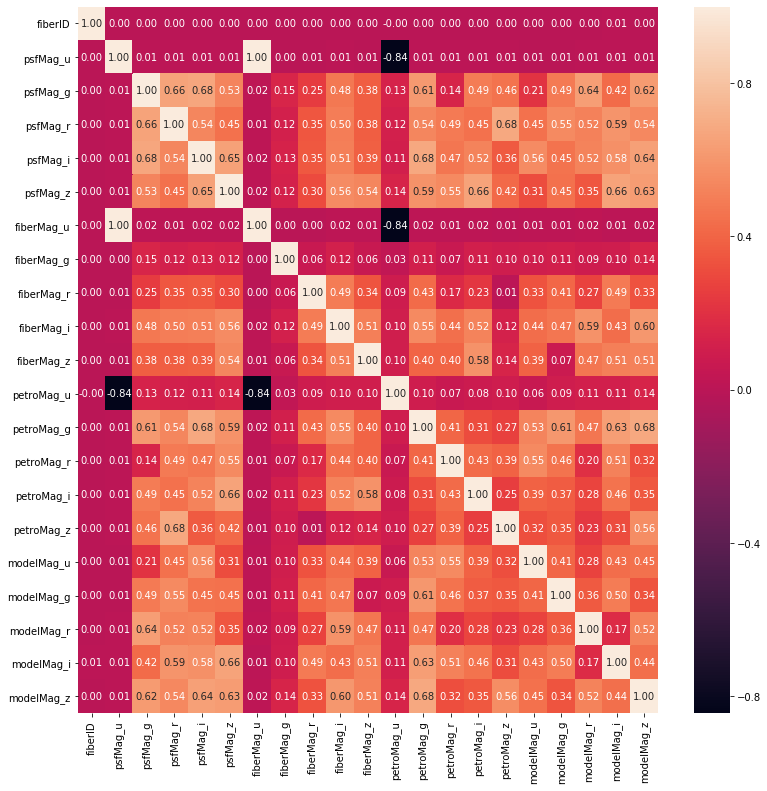

In [9]:
plt.subplots(figsize=(13,13))

ax = sns.heatmap(data=train.corr(),annot=True,fmt='.2f')
buttom,top = ax.get_ylim()
ax.set_ylim(buttom+0.5,top-0.5)

#큰 상관관계는 없어보이지만 psgMag_u와 petroMag_u, 그리고 fiberMag_u와 petroMag_u 사이에는 강한 상관관계가 존재함을 찾아볼 수 있다.
#또한 psfMag_u와 fiberMag_u는 상관관계가 완벽하게 1로 떨어진다.

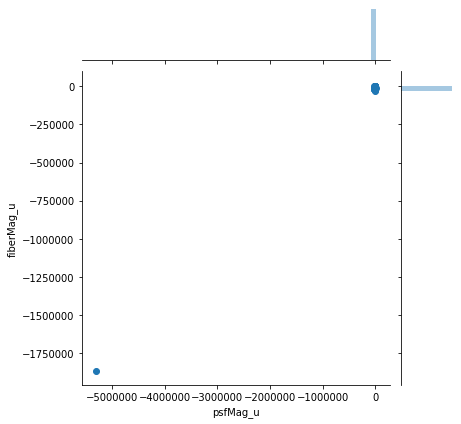

In [10]:
sns.jointplot(x = 'psfMag_u', y = 'fiberMag_u', data = train) 
#다중공선성의 문제 때문에 둘 중 하나는 삭제하는 게 나을것 같다, 데이터가 거의 동일하다

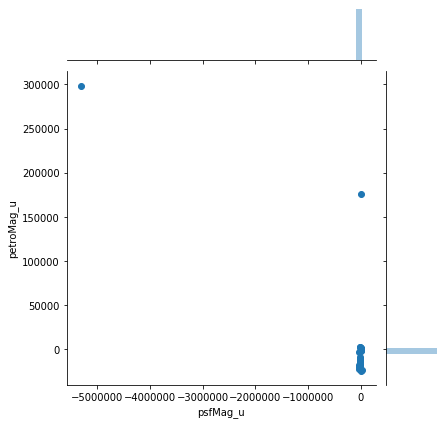

In [11]:
sns.jointplot(x = 'psfMag_u', y = 'petroMag_u', data = train) # 얘네도 삭제하는 게 낫지않나 싶다

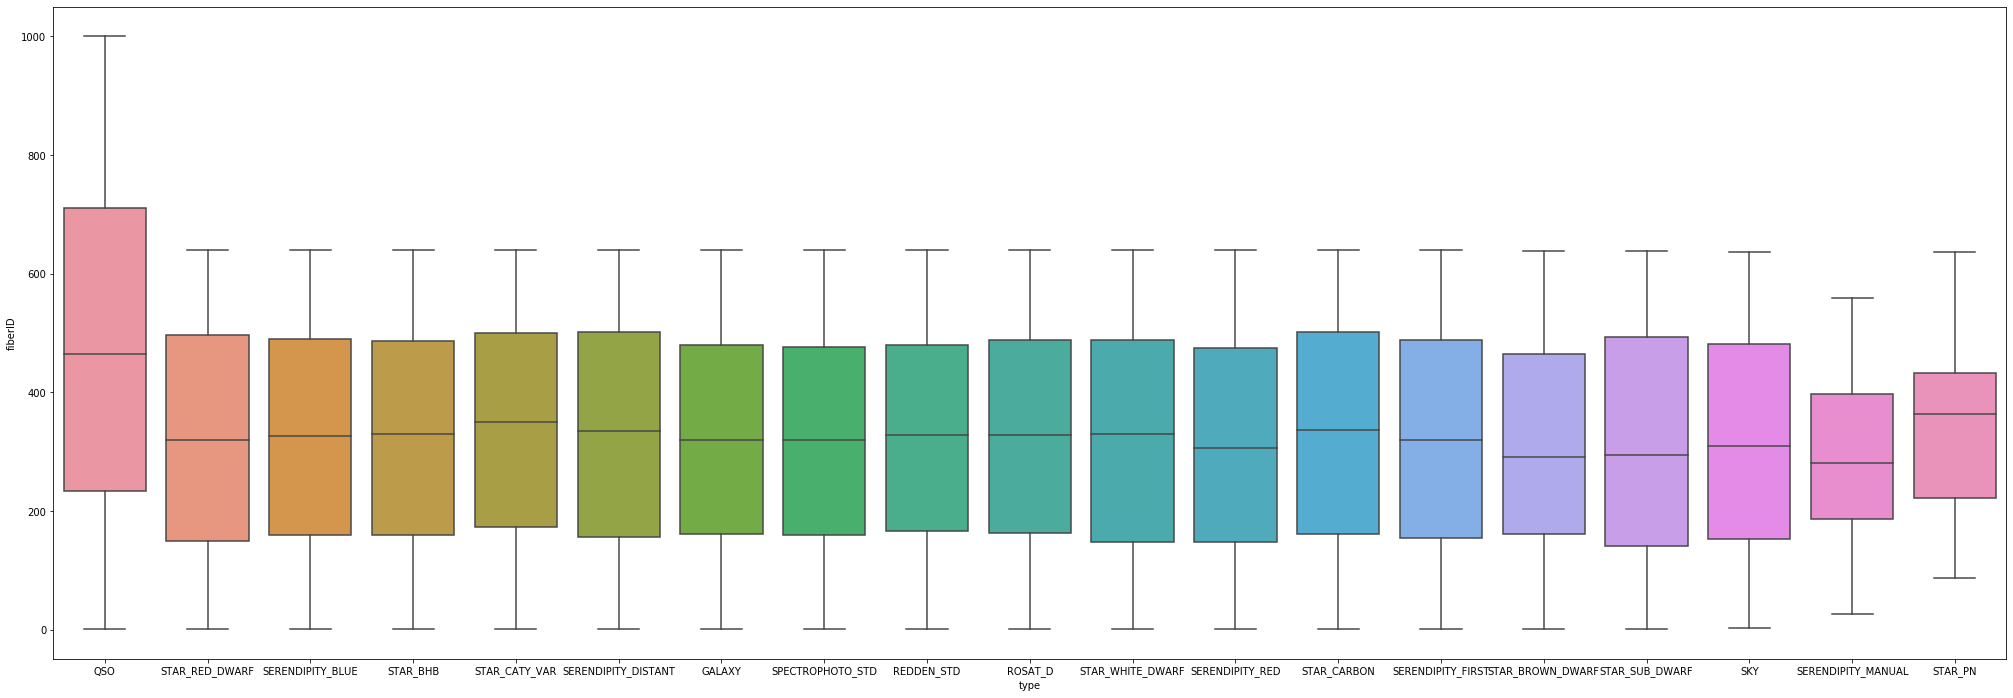

In [12]:
plt.figure(figsize=(35,12))
sns.boxplot(x=train.type, y=train.iloc[:,1], data=train) #fiberID, 매우 고르다. 맘에 든다.

(0, 50)

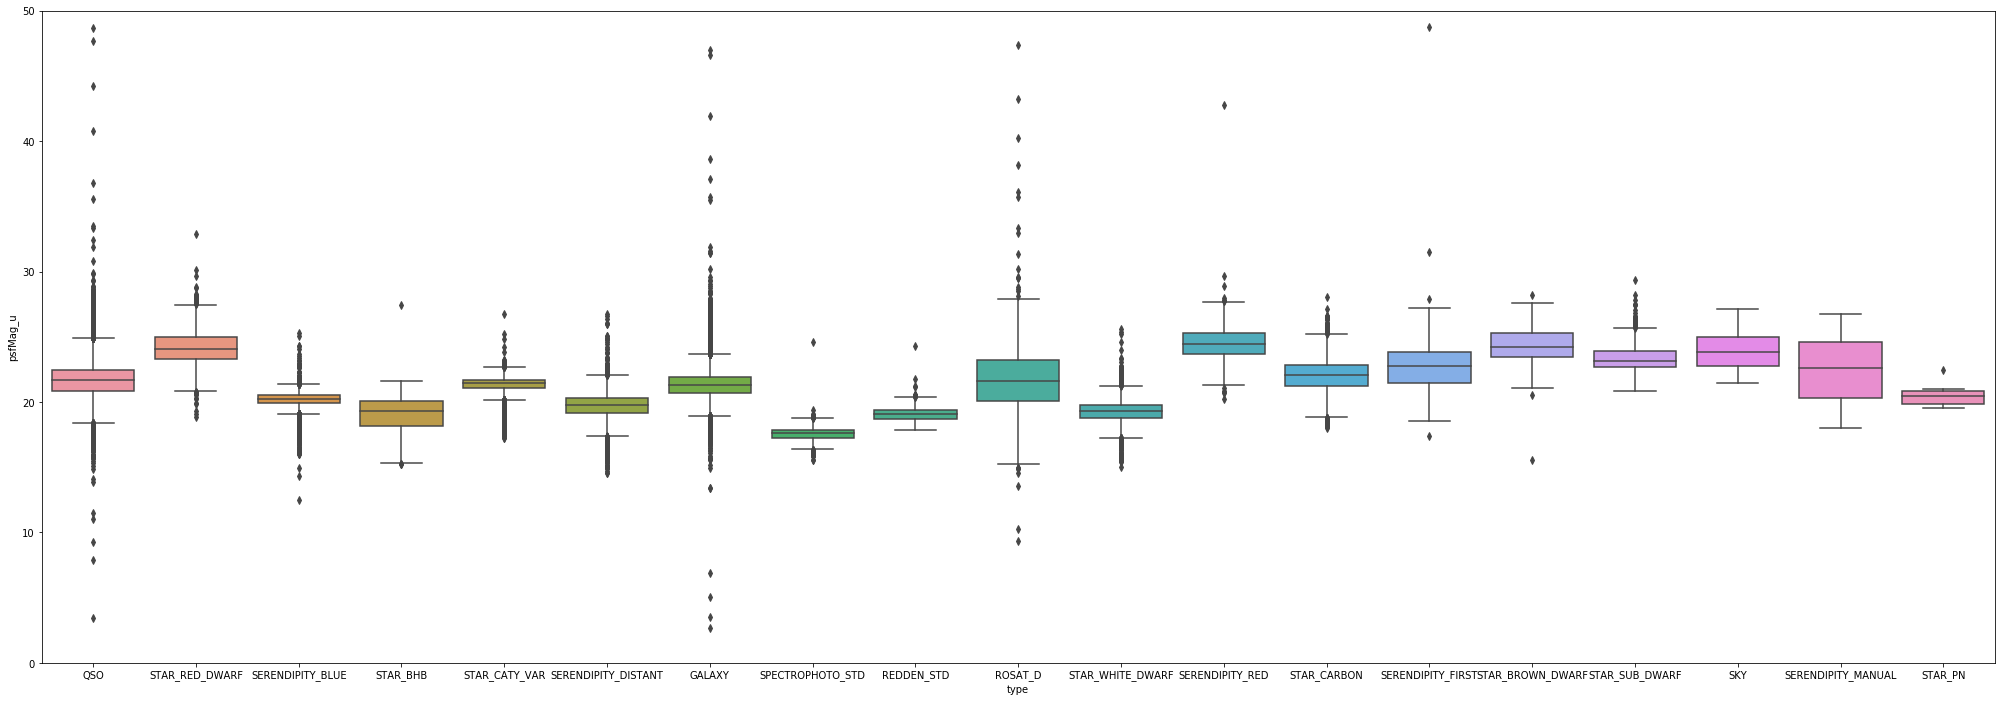

In [13]:
plt.figure(figsize=(35,12))
sns.boxplot(x=train.type, y=train.iloc[:,2], data=train).set_ylim(0,50)

(0, 50)

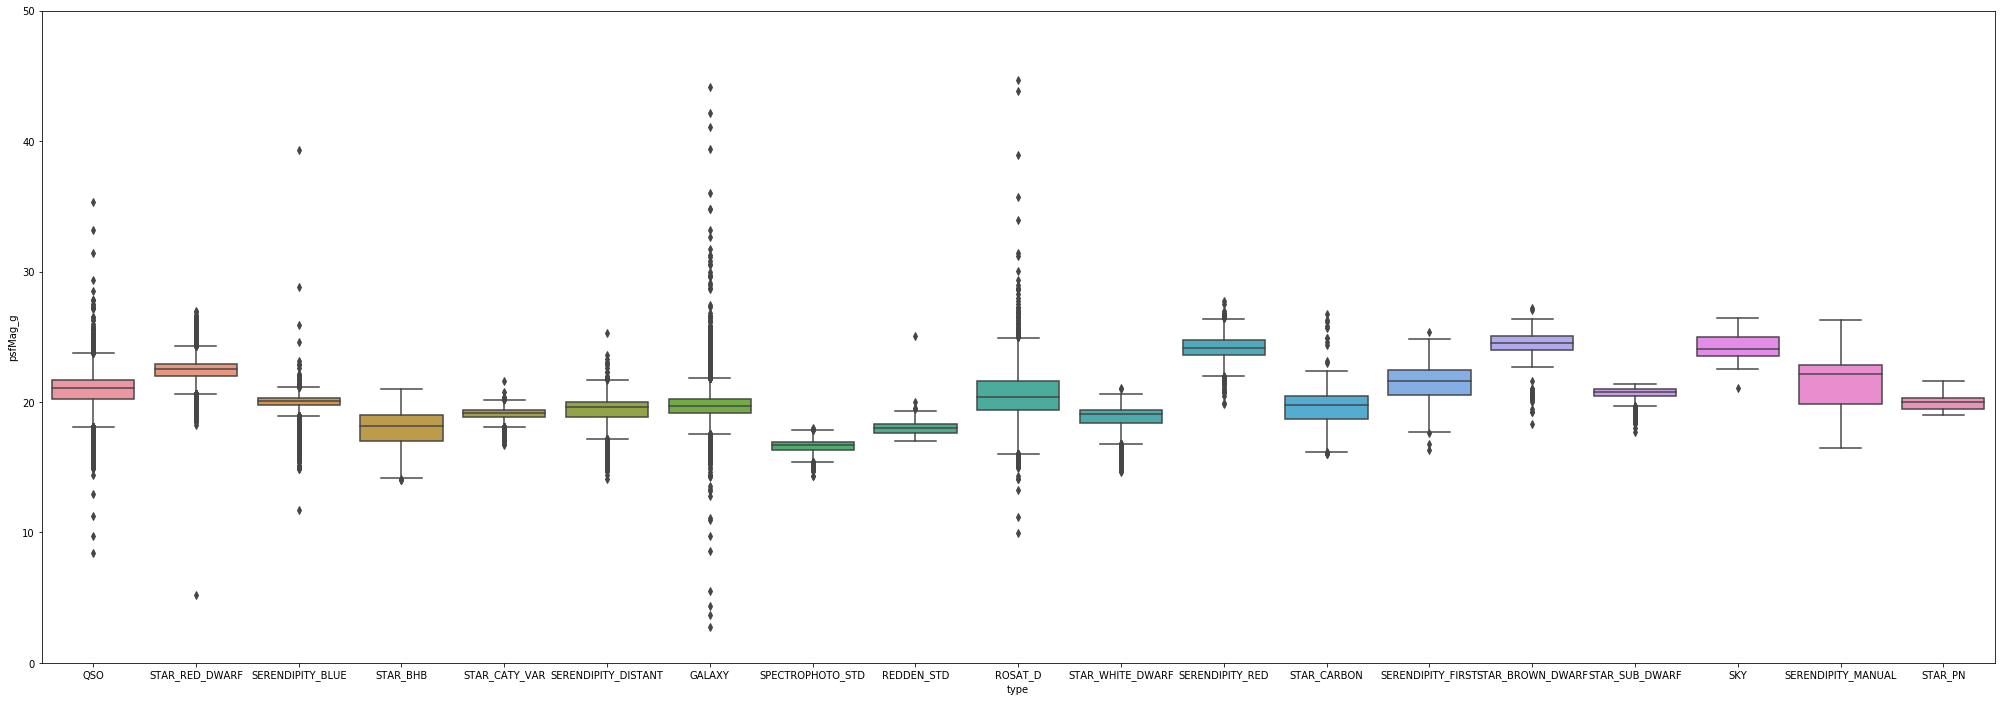

In [14]:
plt.figure(figsize=(35,12))
sns.boxplot(x=train.type, y=train.iloc[:,3], data=train).set_ylim(0,50)

(0, 50)

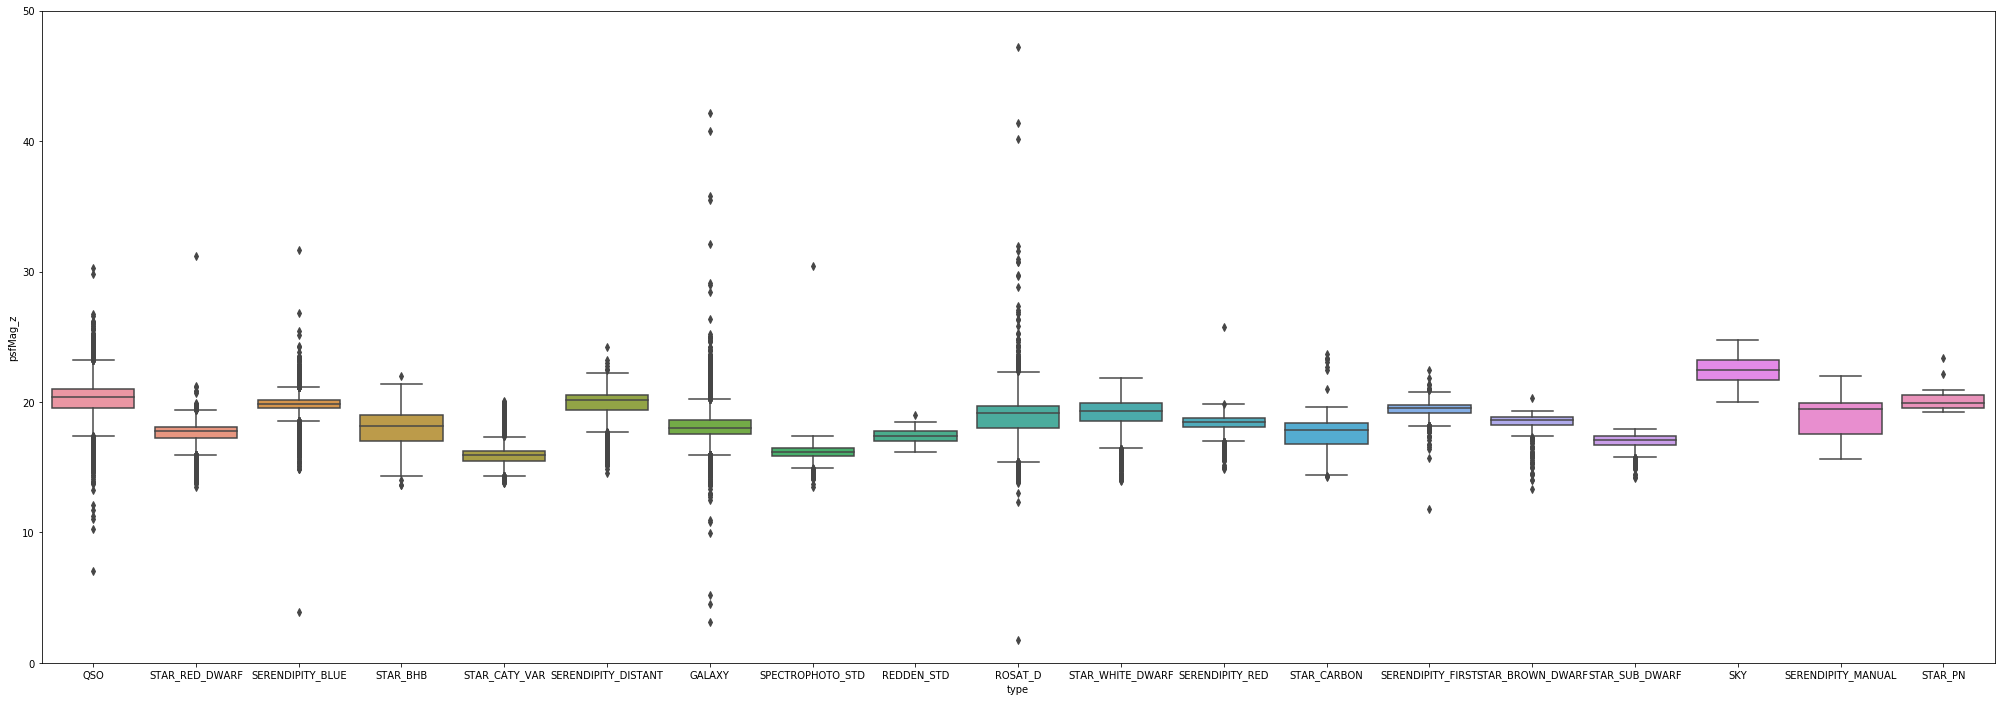

In [15]:
plt.figure(figsize=(35,12))
sns.boxplot(x=train.type, y=train.iloc[:,6], data=train).set_ylim(0,50)
#더 해볼 필요도 없다. 모든 변수들의 box가 0에서 30사이에 형성된다.
#하위권 친구들일수록 outlier가 없는 것은 당연한데, 상위권 친구 중에도 STAR_BHB는 outlier가 많이 없다.

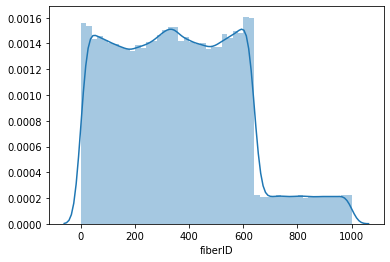

In [16]:
sns.distplot(train.iloc[:,1]) #정규성에 부합하진 않는다.

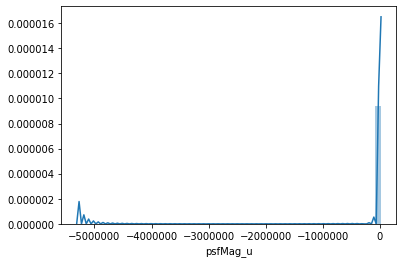

In [31]:
sns.distplot(train.iloc[:,2]) #애매하다..

(-5000, 5000)

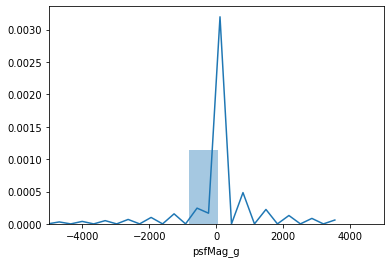

In [26]:
sns.distplot(train.iloc[:,3]).set_xlim(-5000,5000)

(-5000, 5000)

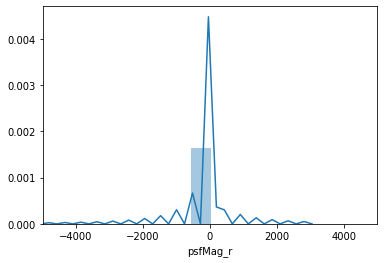

In [25]:
sns.distplot(train.iloc[:,4]).set_xlim(-5000,5000)

(-10000, 10000)

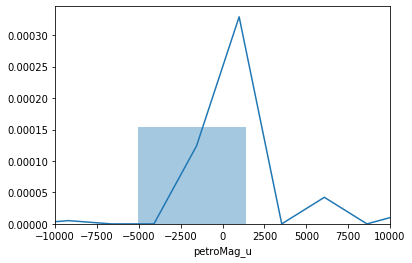

In [32]:
sns.distplot(train.iloc[:,12]).set_xlim(-10000,10000)

(-5000, 5000)

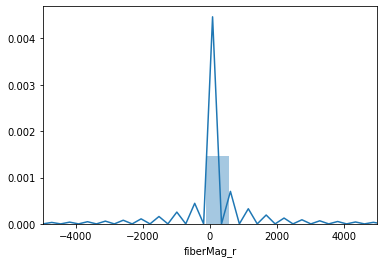

In [34]:
sns.distplot(train.iloc[:,9]).set_xlim(-5000,5000)

#끝에 -u로 끝나는 변수를 제외하고는 대부분 정규성에 부합한다. 아까부터 계속 -u 변수가 문제가 많다.

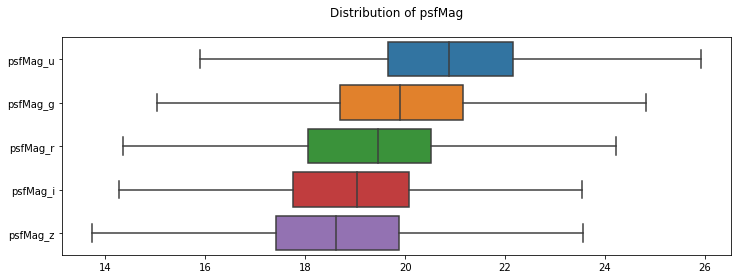

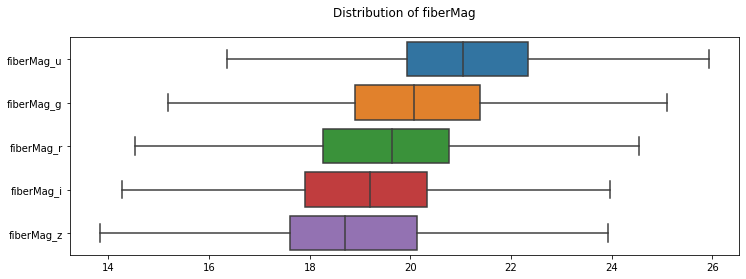

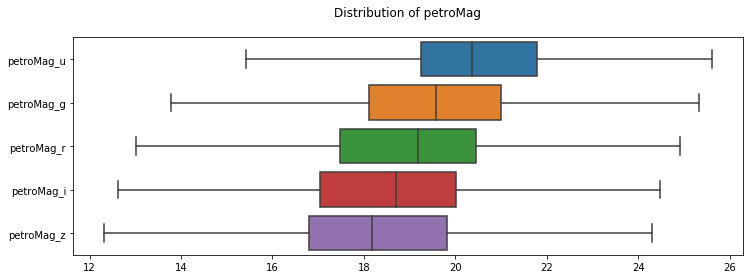

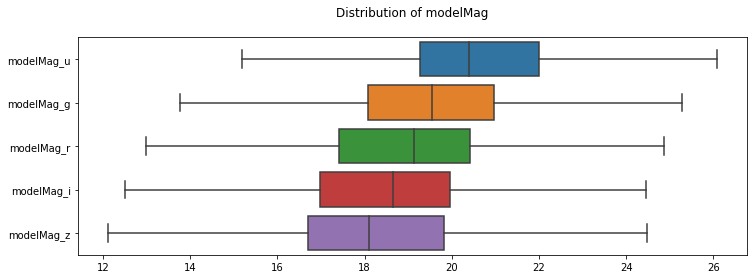

In [43]:
qso = train[train['type']=='QSO']
features = qso.columns[2:]
feature_group = ['psfMag', 'fiberMag', 'petroMag', 'modelMag']
for fg in feature_group:
    plt.figure(figsize=(12,4))
    temp = []
    for i in [x for x in features if fg in x]:
        temp.append(i)
    data = train[temp]
    sns.boxplot(data = data, orient = 'h', showfliers = False)
    plt.title('Distribution of %s\n'%fg)

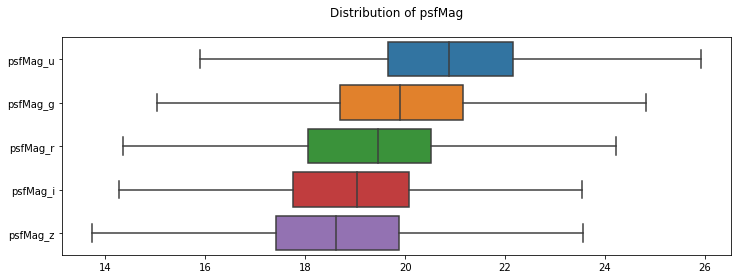

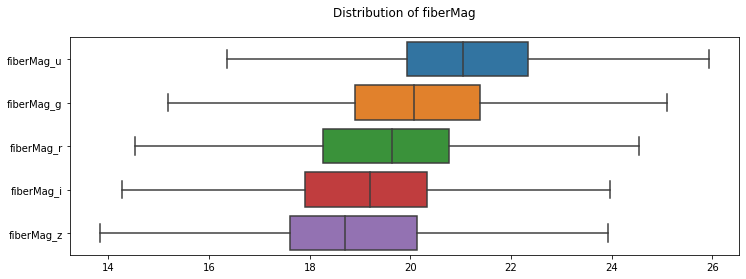

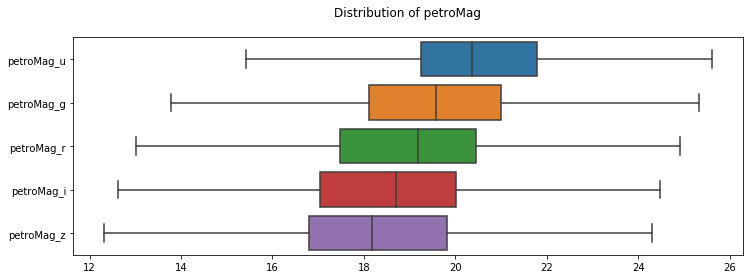

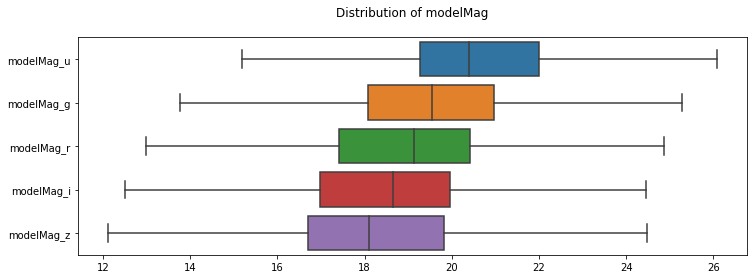

In [44]:
star_red_dwarf = train[train['type']=='STAR_RED_DWARF']
features = star_red_dwarf.columns[2:]
feature_group = ['psfMag', 'fiberMag', 'petroMag', 'modelMag']
for fg in feature_group:
    plt.figure(figsize=(12,4))
    temp = []
    for i in [x for x in features if fg in x]:
        temp.append(i)
    data = train[temp]
    sns.boxplot(data = data, orient = 'h', showfliers = False)
    plt.title('Distribution of %s\n'%fg)

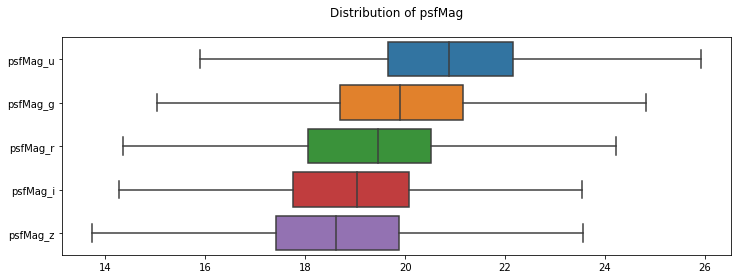

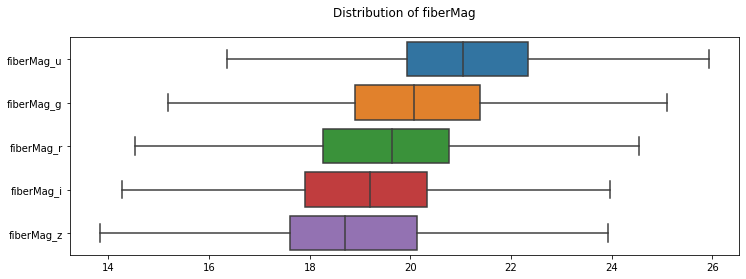

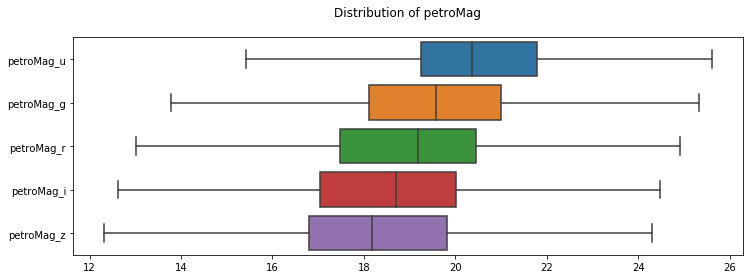

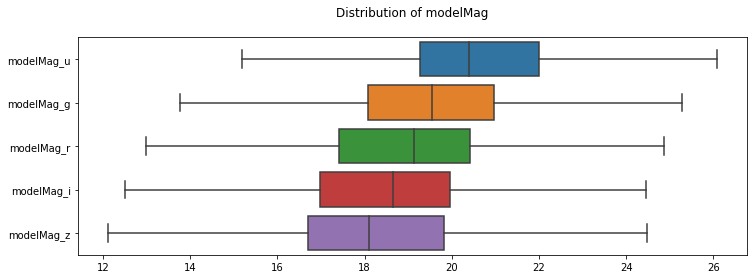

In [45]:
serendipity_blue = train[train['type']=='SRENDIPITY_BLUE']
features = serendipity_blue.columns[2:]
feature_group = ['psfMag', 'fiberMag', 'petroMag', 'modelMag']
for fg in feature_group:
    plt.figure(figsize=(12,4))
    temp = []
    for i in [x for x in features if fg in x]:
        temp.append(i)
    data = train[temp]
    sns.boxplot(data = data, orient = 'h', showfliers = False)
    plt.title('Distribution of %s\n'%fg)
    
#각 type 별로 킹세현님이 짜주신 코드를 적용해보았는데 이렇다할 특징은 없는것 같다. u부터 z까지 순차적으로 box가 형성되어 있다 정도?

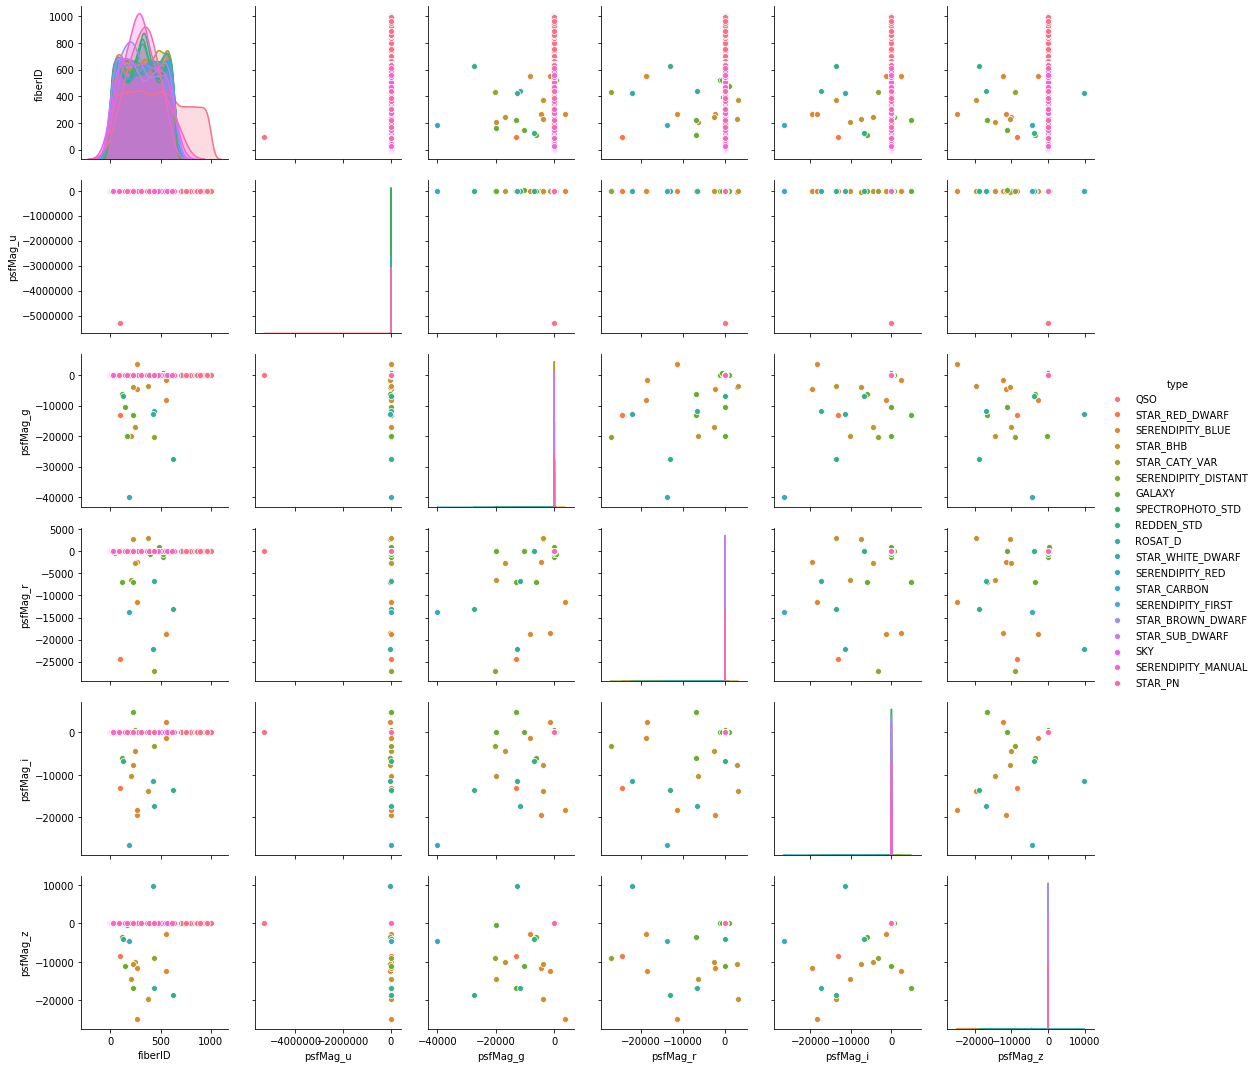

In [57]:
psfMag = train.iloc[:,:7]
sns.pairplot(psfMag,hue='type')
#상당한 outlier 들이 거의 보이긴한다. 근데 

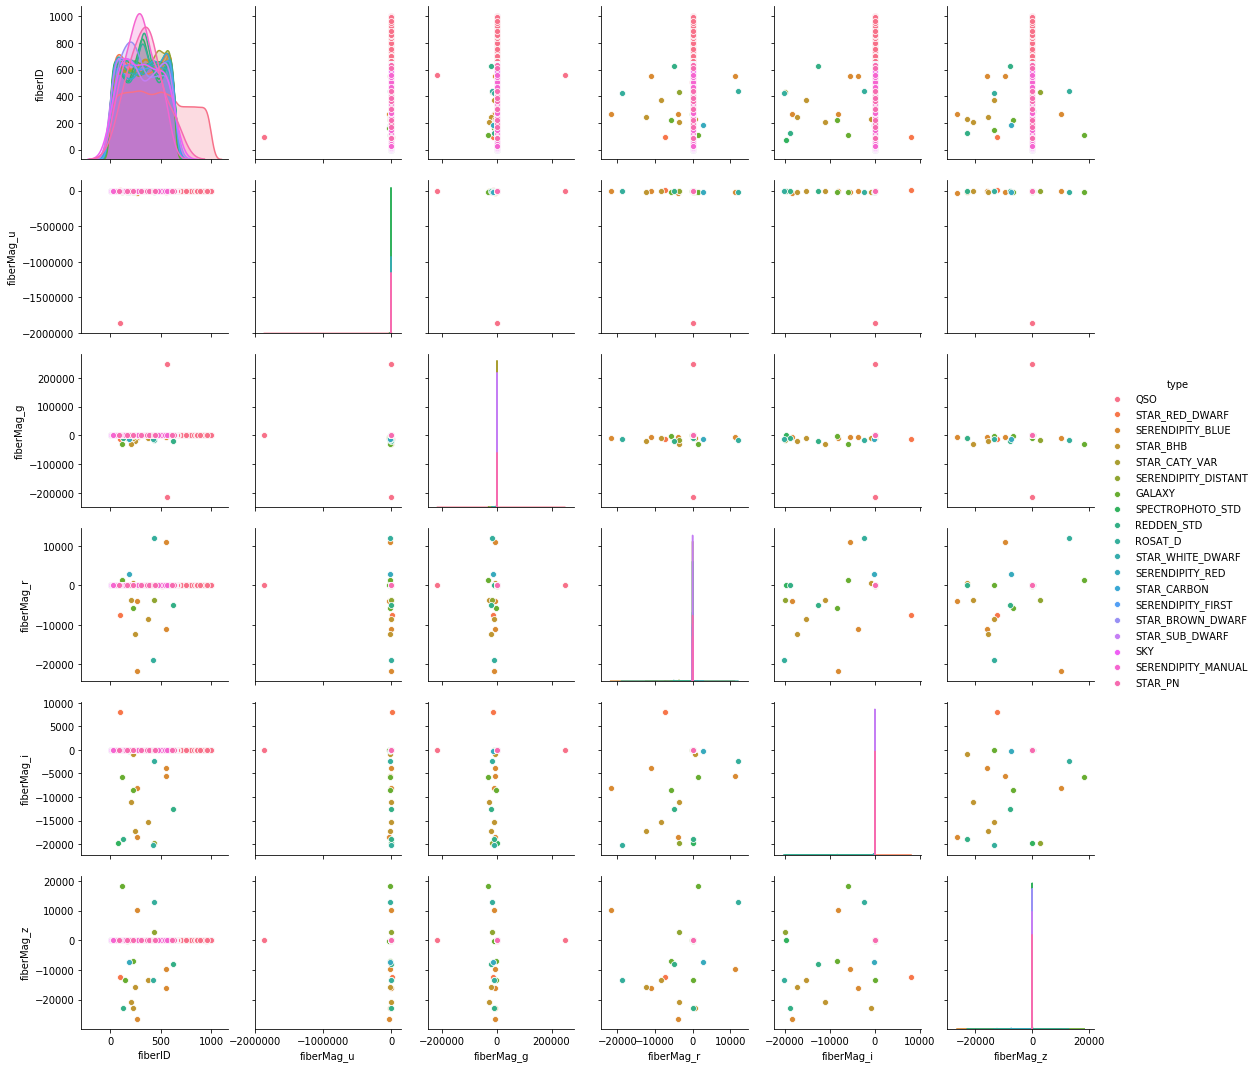

In [76]:
fiberMag = train.iloc[:,[0,1,7,8,9,10,11]]
sns.pairplot(fiberMag,hue='type')
#굳이 위에랑 큰 차일르 찾아보이긴 힘들다. 확실한 것은 fiberMag 라는 이름을 가진 변수 안에는 그렇다할 선형성을 뜨고 있지는 않다. 

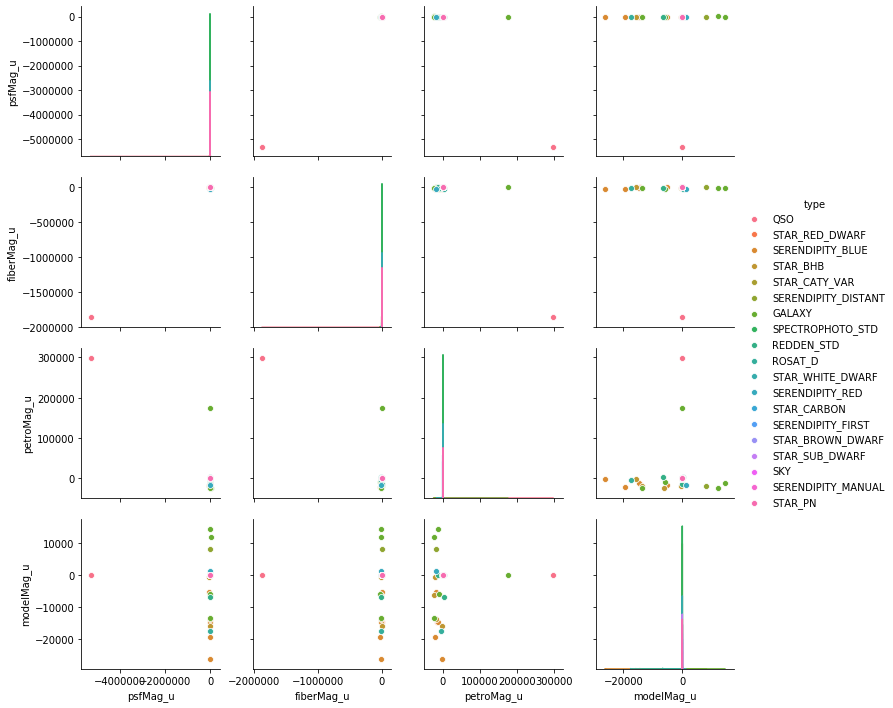

In [85]:
ultraviolet = train.loc[:,['type','psfMag_u','fiberMag_u','petroMag_u','modelMag_u']]
sns.pairplot(ultraviolet,hue='type')
#model_u를 제외하고는 다른 변수들의 값이 거의 같다는 것을 볼 수 있다.

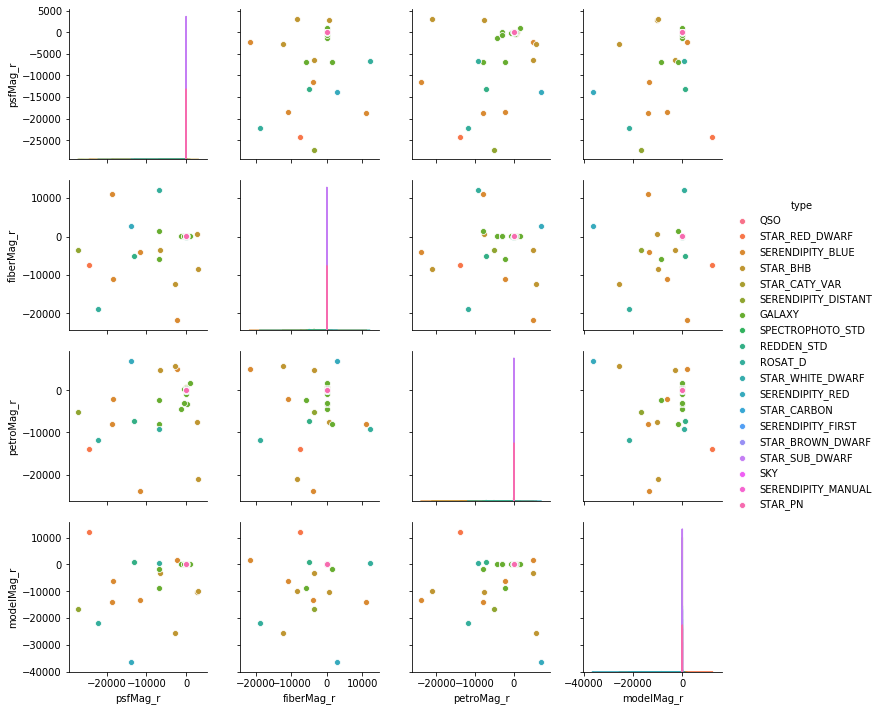

In [86]:
radiowaves = train.loc[:,['type','psfMag_r','fiberMag_r','petroMag_r','modelMag_r']]
sns.pairplot(radiowaves,hue='type')
#상대적으로 괜찮다. 산점도가 고르게 잘 퍼져있다.

In [87]:
train['type'].unique() #우리가 구하려는 종속변수 type은 범주형 자료이다. 심지어 상당히 많다...    

array(['QSO', 'STAR_RED_DWARF', 'SERENDIPITY_BLUE', 'STAR_BHB',
       'STAR_CATY_VAR', 'SERENDIPITY_DISTANT', 'GALAXY',
       'SPECTROPHOTO_STD', 'REDDEN_STD', 'ROSAT_D', 'STAR_WHITE_DWARF',
       'SERENDIPITY_RED', 'STAR_CARBON', 'SERENDIPITY_FIRST',
       'STAR_BROWN_DWARF', 'STAR_SUB_DWARF', 'SKY', 'SERENDIPITY_MANUAL',
       'STAR_PN'], dtype=object)

In [88]:
type_dict = {j: i for i, j in enumerate(train['type'].unique())} #위 친구를 숫자와 같이 하여 dict 형태로 바꿔준다.
train['type'] = train['type'].replace(type_dict) #해당 사항을 원래 train 데이터의 type에 반영해준다
train
#나중을 대비하여..

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,
0,0,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,...,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,0,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,...,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,0,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,...,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,0,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,...,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,1,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,...,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199986,0,568,20.630780,20.437920,20.050756,20.020974,19.959646,20.948519,20.726709,20.311562,...,20.836400,20.536338,20.126561,20.102815,19.796722,20.783295,20.326879,20.014046,20.061940,19.862513
199987,6,362,25.283695,22.807243,21.069792,20.187531,19.595598,26.677671,22.818723,20.786120,...,28.895442,22.250489,20.091693,18.985791,18.803354,26.921903,21.952440,19.776321,18.990039,18.528306
199988,1,146,23.609826,21.902709,20.330747,18.457535,17.326771,24.320816,22.287946,20.711737,...,25.982378,22.132993,20.329624,18.507337,17.418521,24.503460,21.897599,20.420524,18.443126,17.331724


In [ ]:
요약
1. type 별로 그 수가 매우 비대칭구조이다. 
QSO, STAR_RED_DWARF, SERENDIPITY_BLUE가 주류를 이루고 있는 반면, SKY, SERNDIPITY_MANUAL, STAR_PN은 거의 안보임
2. 변수중에서 ultraviolet이 조금 이상하다. 특히 psfMag_u, fiberMag_u, petroMag_u는 몇몇의 outlier를 제외하고는 데이터가 거의 동일하며,
상관계수도 상당히 높다. 다만 model_u는 제외한다. 또한, 분포도를 그렸을 때 정규성조차 띄지 않는다. 매우 혼란스럽다.
3. fiberID의 경우에는 유일하게 int type으로 형성되어 있으며 1~1000까지의 값이 존재한다. 여기에 다른 변수와는 다른 유의미한 무언가가 존재할 것 같다.
4. fiberID를 제외하곤 모든 변수들의 boxplot이 0에서 50 사이에 그려진다. 근데 outlier가 뜬금없게 막 -10000000 요런게 많이 보인다. 속상하다.
5. type 별로 묶은 후에 변수별로 묶어봤는데 유의미한 무언가를 찾아내기는 힘들었다.
6. 정리하자면, u를 제외한 변수들은 대부분 random? 하다고 보면된다. u는 특이하다. ID는 다른 변수와는 다른 특징을 지니고 있다. type은 수가 일정치 않다. 